Addition Network
================

In [66]:
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
np.random.seed(1337)
from keras.models import Sequential
from keras.layers import Dense

In [112]:
# make a list of 100 pairs from 0-25 for the network to add together
input_data = np.random.randint(25, size=(100,2))
target_data = np.array([x[0] + x[1] for x in input_data])
for ii in range(10):
    a, b = input_data[ii, :]
    ans = target_data[ii]
    print('{0:>2} + {1:>2} = {2:>2}'.format(a, b, ans))

15 +  1 = 16
15 + 15 = 30
 3 + 22 = 25
 7 +  1 =  8
 7 +  7 = 14
18 +  7 = 25
 7 + 18 = 25
 9 +  4 = 13
20 +  4 = 24
16 + 20 = 36


Now that we have our data set, let's split it into training and testing data

In [68]:
train_size = 75

# this is the data we train the network on
x_train = input_data[:train_size, :]
y_train = target_data[:train_size]

# this is the data that we test to see how well we did during training
x_test = input_data[train_size:, :]
y_test = target_data[train_size:]

print('x_train.shape={0}, y_train.shape={1}'.format(x_train.shape, y_train.shape))
print('x_test.shape={0}, y_test.shape={1}'.format(x_test.shape, y_test.shape))

x_train.shape=(75, 2), y_train.shape=(75,)
x_test.shape=(25, 2), y_test.shape=(25,)


Network Architecture
====================

Now that we have our data split the way we want it, we can design the architecture of the network.

Since the task at hand is linear, we will first use linear activation functions.

To keep things simple, we will use the Mean Square Error loss function and the Adam optimizer

In [69]:
model = Sequential()
model.add(Dense(2, input_dim=x_train.shape[1], activation='linear'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), batch_size=1)
y_hat = model.predict(x_test)

Train on 75 samples, validate on 25 samples
Epoch 1/100
75/75 [==============================] - 1s 9ms/step - loss: 53.8786 - val_loss: 28.4418
Epoch 2/100
75/75 [==============================] - 0s 2ms/step - loss: 15.8106 - val_loss: 10.9260
Epoch 3/100
75/75 [==============================] - 0s 2ms/step - loss: 7.0144 - val_loss: 7.5543
Epoch 4/100
75/75 [==============================] - 0s 2ms/step - loss: 5.2460 - val_loss: 6.1277
Epoch 5/100
75/75 [==============================] - 0s 2ms/step - loss: 4.3506 - val_loss: 5.0097
Epoch 6/100
75/75 [==============================] - 0s 1ms/step - loss: 3.5760 - val_loss: 4.0416
Epoch 7/100
75/75 [==============================] - 0s 1ms/step - loss: 2.8181 - val_loss: 3.1809
Epoch 8/100
75/75 [==============================] - 0s 2ms/step - loss: 2.1953 - val_loss: 2.4752
Epoch 9/100
75/75 [==============================] - 0s 1ms/step - loss: 1.6965 - val_loss: 1.8656
Epoch 10/100
75/75 [==============================] - 0s 1ms/

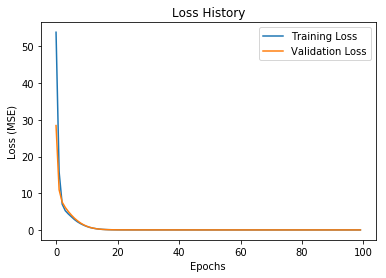

In [70]:
# let's log the loss functions and plot them 
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.show('addition_loss.png')
plt.close()

The loss looks great. There is no reason to believe that we are overfitting so the network weights should be well trained for this purpose. Let's look at the actual results

In [114]:
for ii in range(x_test.shape[0]):
    a, b = x_test[ii, :]
    true_ans = y_test[ii]
    network_ans = y_hat[ii][0]
    print('{0:>2} + {1:>2} = {2:<10}'.format(a,b,network_ans))

12 + 14 = 25.9999980927
23 +  9 = 31.9999980927
21 +  0 = 21.0      
 5 + 17 = 21.9999980927
18 +  5 = 23.0000019073
 2 + 17 = 19.0000019073
14 + 19 = 32.9999961853
11 + 17 = 27.9999980927
 1 + 19 = 19.9999980927
 7 +  4 = 11.0000038147
23 +  7 = 29.9999980927
12 + 22 = 34.0      
12 +  6 = 18.0000019073
 9 + 12 = 21.0000019073
 4 + 22 = 25.9999961853
 4 +  2 = 6.00000476837
15 + 18 = 33.0      
 6 +  1 = 7.00000476837
24 + 13 = 37.0      
16 + 24 = 40.0000038147
16 +  8 = 24.0      
19 + 13 = 32.0000038147
 6 + 18 = 23.9999980927
 1 + 19 = 19.9999980927
 3 +  5 = 8.0000038147


And there we have it! To >= 5 decimal places, we have taught a neural network how to add 2 numbers together. 

In [81]:
weights0, biases0 = model.layers[0].get_weights()
weights1, biases1 = model.layers[1].get_weights()

print(weights0.T, biases0, '\n')
print(weights1, biases1)

(array([[-1.0307773 , -0.8174403 ],
       [ 1.0303065 ,  0.31815538]], dtype=float32), array([0.00052368, 0.00132442], dtype=float32), '\n')
(array([[-1.3847893],
       [-0.4148374]], dtype=float32), array([0.00127966], dtype=float32))


From this, we can see that the network has chosen a different set of weights than we had. Specifically, the network is doing the following operation to the input vector (a,b) (ignoring the biases which are close to 0)

\begin{equation}
\begin{pmatrix}
    -1.3847893 & -0.4148374
\end{pmatrix}
\begin{pmatrix}
    -1.0307773 & -0.8174403\\
    1.0303065 &  0.31815538
\end{pmatrix}
\begin{pmatrix}
    a\\
    b
\end{pmatrix}
=
\begin{pmatrix}
0.9999999 & 0.9999998
\end{pmatrix}
\begin{pmatrix}
    a\\
    b
\end{pmatrix}
\end{equation}


In [82]:
tot_weights = weights1.T.dot(weights0.T)
print(tot_weights)

[[0.9999999 0.9999998]]


This is the result of multiplying the weights. When we dot the input with this, we can see that we very nearly get the sum of the input vector.

To see another network which performs symbolic addition on a string (e.g, input "12+16" and the network says 38) look [here](https://github.com/keras-team/keras/blob/4f2e65c385d60fa87bb143c6c506cbe428895f44/examples/addition_rnn.py)